In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
#loading the dataset
data = pd.read_csv("/content/housing.csv", names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], delimiter=r"\s+")
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [ ]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

X = data.drop('MEDV', axis=1)
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [ ]:
#modeling on non preprocessed data
test_model_1= tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(1)
    ]
)

test_model_1.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])

test_model_1_history = test_model_1.fit(X, y, epochs=100)



Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 36.5718 - mae: 36.5718
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 11.3825 - mae: 11.3825
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 7.9853 - mae: 7.9853
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 7.0933 - mae: 7.0933
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 6.8152 - mae: 6.8152
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 6.6091 - mae: 6.6091
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 6.6377 - mae: 6.6377
Epoch 8/100
16/16 [==============================] - 0s 5ms/step - loss: 6.5479 - mae: 6.5479
Epoch 9/100
16/16 [==============================] - 0s 5ms/step - loss: 6.3675 - mae: 6.3675
Epoch 10/100
16/16 [==============================] - 0s 4ms/step - loss: 6.6125 - mae: 6.6125
Epoch 11/100
16/16 [==============================] - 0

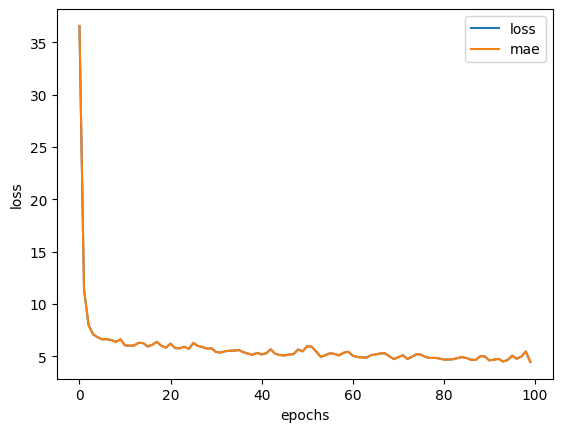

In [ ]:
import matplotlib.pyplot as plt

def plot_model_loss(model_history):
  pd.DataFrame(model_history.history).plot()
  plt.xlabel("epochs")
  plt.ylabel("loss")
  plt.show()


plot_model_loss(test_model_1_history)

In [ ]:
#testing a model with eatlrly stopping callbacks
# callback= tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

test_model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

test_model_2.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])

test_model_2_history = test_model_2.fit(X_train, y_train, epochs=500)

Epoch 1/500
13/13 [==============================] - 3s 7ms/step - loss: 15.5998 - mae: 15.5998
Epoch 2/500
13/13 [==============================] - 0s 7ms/step - loss: 8.1275 - mae: 8.1275
Epoch 3/500
13/13 [==============================] - 0s 7ms/step - loss: 7.1688 - mae: 7.1688
Epoch 4/500
13/13 [==============================] - 0s 8ms/step - loss: 6.1913 - mae: 6.1913
Epoch 5/500
13/13 [==============================] - 0s 5ms/step - loss: 5.9499 - mae: 5.9499
Epoch 6/500
13/13 [==============================] - 0s 6ms/step - loss: 5.8192 - mae: 5.8192
Epoch 7/500
13/13 [==============================] - 0s 6ms/step - loss: 5.6008 - mae: 5.6008
Epoch 8/500
13/13 [==============================] - 0s 7ms/step - loss: 5.3307 - mae: 5.3307
Epoch 9/500
13/13 [==============================] - 0s 5ms/step - loss: 5.3692 - mae: 5.3692
Epoch 10/500
13/13 [==============================] - 0s 9ms/step - loss: 5.6467 - mae: 5.6467
Epoch 11/500
13/13 [==============================] - 0s 

In [ ]:
test_model_1.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 4.2113 - mae: 4.2113


[4.211338043212891, 4.211338043212891]

In [ ]:
test_model_2.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 2.5296 - mae: 2.5296


[2.529595136642456, 2.529595136642456]

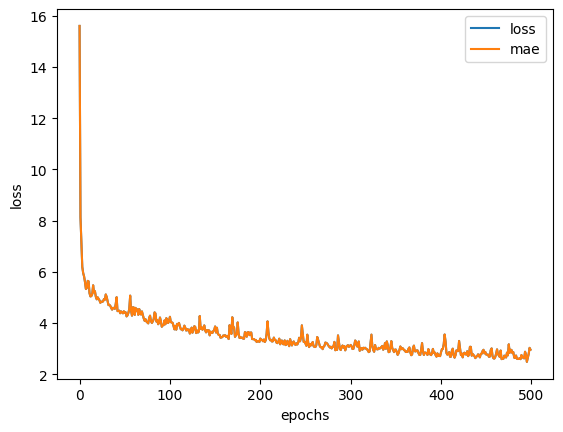

In [ ]:
plot_model_loss(test_model_2_history)

In [ ]:
data.RAD.unique(), data.ZN.unique()

(array([ 1,  2,  3,  5,  4,  8,  6,  7, 24]),
 array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
         17.5,  80. ,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,  22. ,
         20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ]))

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
data.CHAS.unique()

array([0, 1])

In [ ]:
# normalizing the model
from sklearn.preprocessing import OneHotEncoder

ct = column_transformer = make_column_transformer(
    (MinMaxScaler(),['ZN','AGE','DIS','TAX','PTRATIO','B','LSTAT']),
    (OneHotEncoder(handle_unknown="ignore"),['RAD','CHAS'])
)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
X_train_normal[0]

array([0.        , 0.93048128, 0.07613964, 0.47709924, 0.91489362,
       0.95297292, 0.41859823, 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        ])

In [ ]:
X_train_normal.shape, X_train.shape

((404, 18), (404, 13))

In [ ]:
# modelling with normalizied data without activation functions
test_normal_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

#compiling the model

test_normal_model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])

#fitting the model on training data
test_normal_history = test_normal_model.fit(X_train_normal, y_train, epochs=100)



Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 22.2913 - mae: 22.2913
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 21.2762 - mae: 21.2762
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 19.8009 - mae: 19.8009
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 17.5123 - mae: 17.5123
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 14.1235 - mae: 14.1235
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 10.0658 - mae: 10.0658
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 7.5860 - mae: 7.5860
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 7.3130 - mae: 7.3130
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 6.9074 - mae: 6.9074
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 6.6671 - mae: 6.6671
Epoch 11/100
13/13 [===========================

In [ ]:
test_normal_model.evaluate(X_test_normal, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 3.7957 - mae: 3.7957


[3.795717239379883, 3.795717239379883]

In [ ]:
test_model_1.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 4.2113 - mae: 4.2113


[4.211338043212891, 4.211338043212891]

In [ ]:
test_model_2.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 2.5296 - mae: 2.5296


[2.529595136642456, 2.529595136642456]

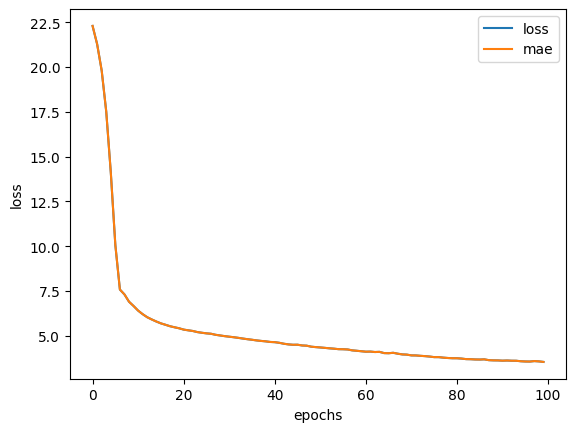

In [ ]:
plot_model_loss(test_normal_history)

In [ ]:
#modelling with normlaized data with activation functions

test_normal_model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
    ])

#compiling the model
test_normal_model_2.compile(loss="mae", optimizer="adam", metrics=["mae"])

#fitting the model
test_normal_model_2_history = test_normal_model_2.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 22.5319 - mae: 22.5319
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 22.1421 - mae: 22.1421
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 21.5874 - mae: 21.5874
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 20.7100 - mae: 20.7100
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 19.3118 - mae: 19.3118
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 17.2389 - mae: 17.2389
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 14.5045 - mae: 14.5045
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 11.6528 - mae: 11.6528
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 9.7009 - mae: 9.7009
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 8.7368 - mae: 8.7368
Epoch 11/100
13/13 [=======================

In [ ]:
test_normal_model_2.evaluate(X_test_normal, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 3.6581 - mae: 3.6581


[3.6580631732940674, 3.6580631732940674]

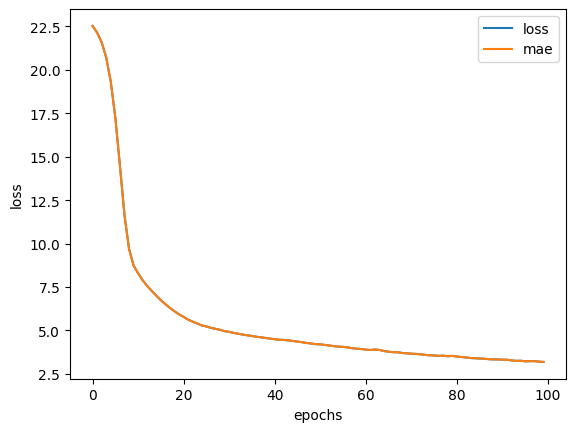

In [ ]:
plot_model_loss(test_normal_model_2_history)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, test_normal_model_2.predict(X_test_normal))
# test_normal_model_2.predict(X_test_normal)

4/4 [==============================] - 0s 2ms/step


26.03346352802167

In [ ]:
# trying on learning_rate with Adam

test_normal_model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#compiling the model
test_normal_model_3.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["mae"])

#fitting the model for 100 epochs
test_normal_model_3_history = test_normal_model_3.fit(X_train_normal, y_train, epochs=100)


Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 20.5085 - mae: 20.5085
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 10.8211 - mae: 10.8211
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 7.0153 - mae: 7.0153
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 5.9270 - mae: 5.9270
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 5.4566 - mae: 5.4566
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 5.2018 - mae: 5.2018
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 4.8778 - mae: 4.8778
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 4.6308 - mae: 4.6308
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 4.3923 - mae: 4.3923
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 4.2345 - mae: 4.2345
Epoch 11/100
13/13 [==============================] - 0

In [ ]:
test_normal_model_3.evaluate(X_train_normal, y_train)

13/13 [==============================] - 1s 3ms/step - loss: 2.5817 - mae: 2.5817


[2.5816714763641357, 2.5816714763641357]

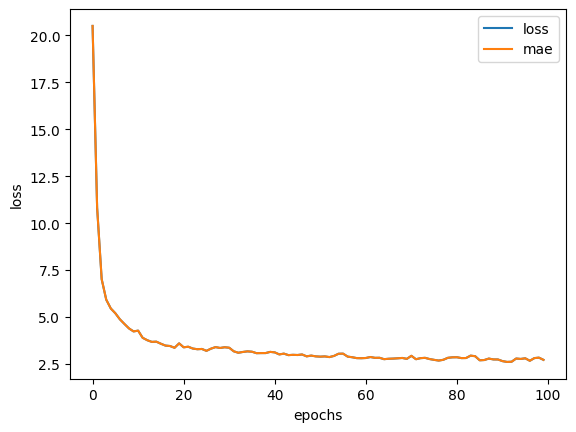

In [ ]:
plot_model_loss(test_normal_model_3_history)

In [ ]:
mean_squared_error(y_test, test_normal_model_3.predict(X_test_normal))

4/4 [==============================] - 0s 3ms/step


17.387707410195947

In [ ]:
len(X_test_normal), len(y_test)

(102, 102)

In [ ]:
y_preds = test_normal_model_3.predict(X_test_normal)
def plot_predictions(y_true=y_test, y_preds=y_preds):
  plt.figure(figsize=(15,10))
  plt.plot(np.arange(0,102),y_true, c="g", label="Actual")
  plt.plot(np.arange(0,102),y_preds, c="b", label="Predicted", linestyle="dotted")
  plt.title("Prediction Accuracy")
  plt.xlabel("Data Points")
  plt.ylabel("Y_Values")
  plt.legend()
  plt.show()

4/4 [==============================] - 0s 5ms/step


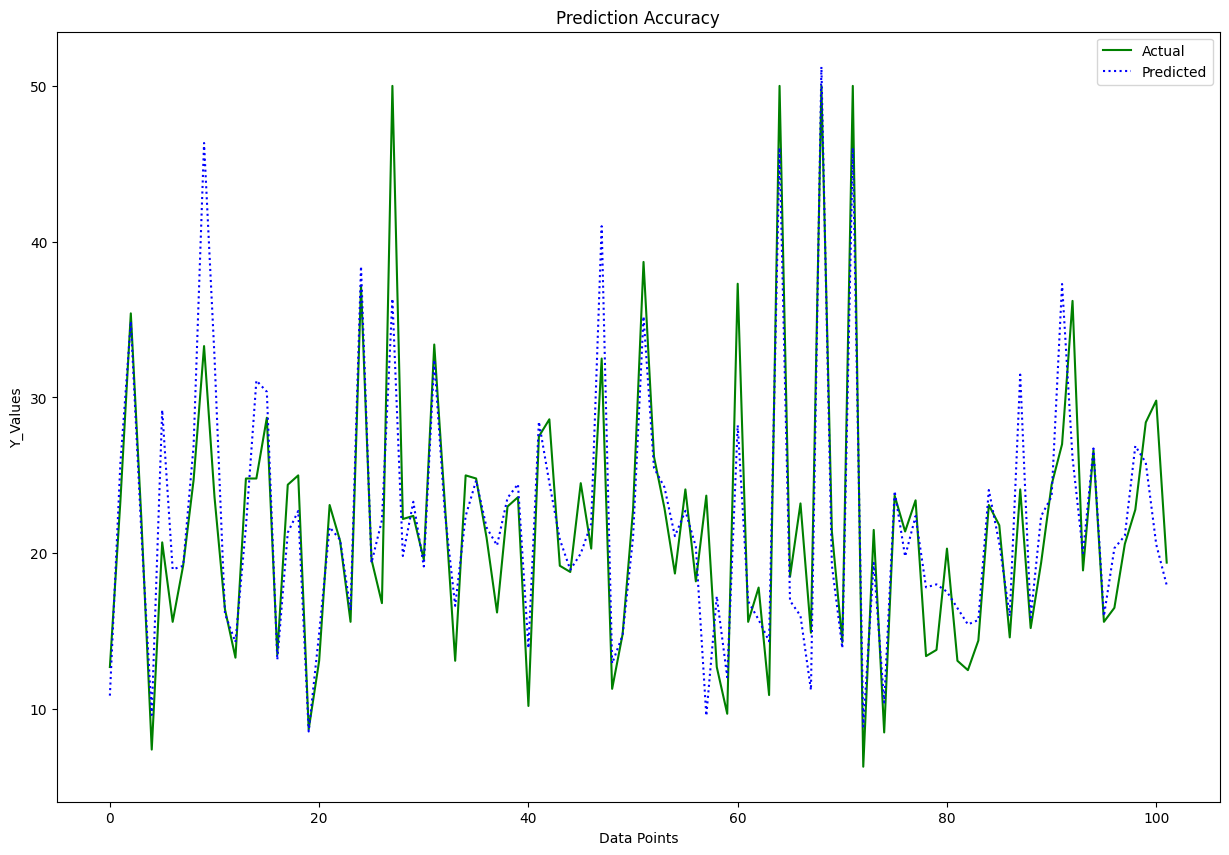

In [ ]:
plot_predictions(y_preds=tf.squeeze(y_preds), y_true=tf.cast(tf.squeeze(y_test),tf.float32))

4/4 [==============================] - 0s 4ms/step


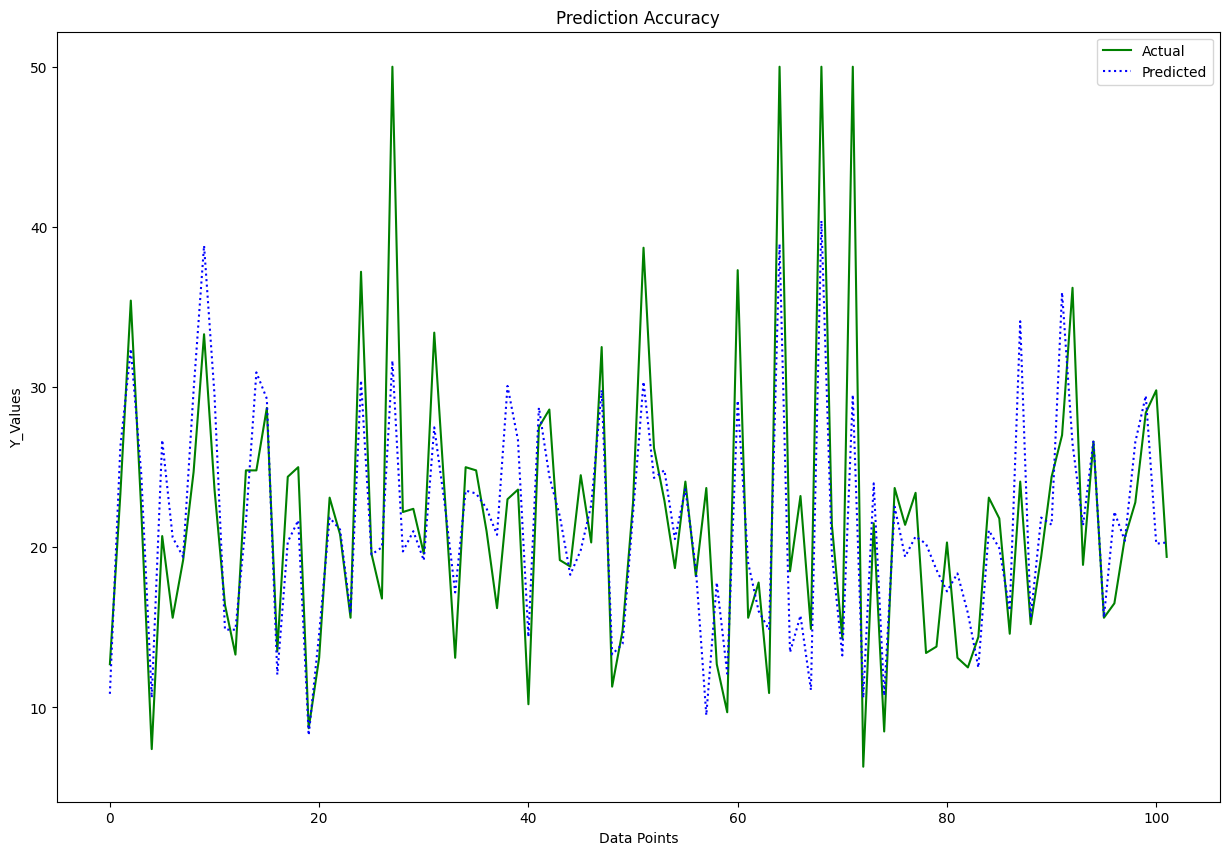

In [ ]:
plot_predictions(y_preds=tf.squeeze(test_normal_model_2.predict(X_test_normal)), y_true=tf.squeeze(y_test))

4/4 [==============================] - 0s 4ms/step


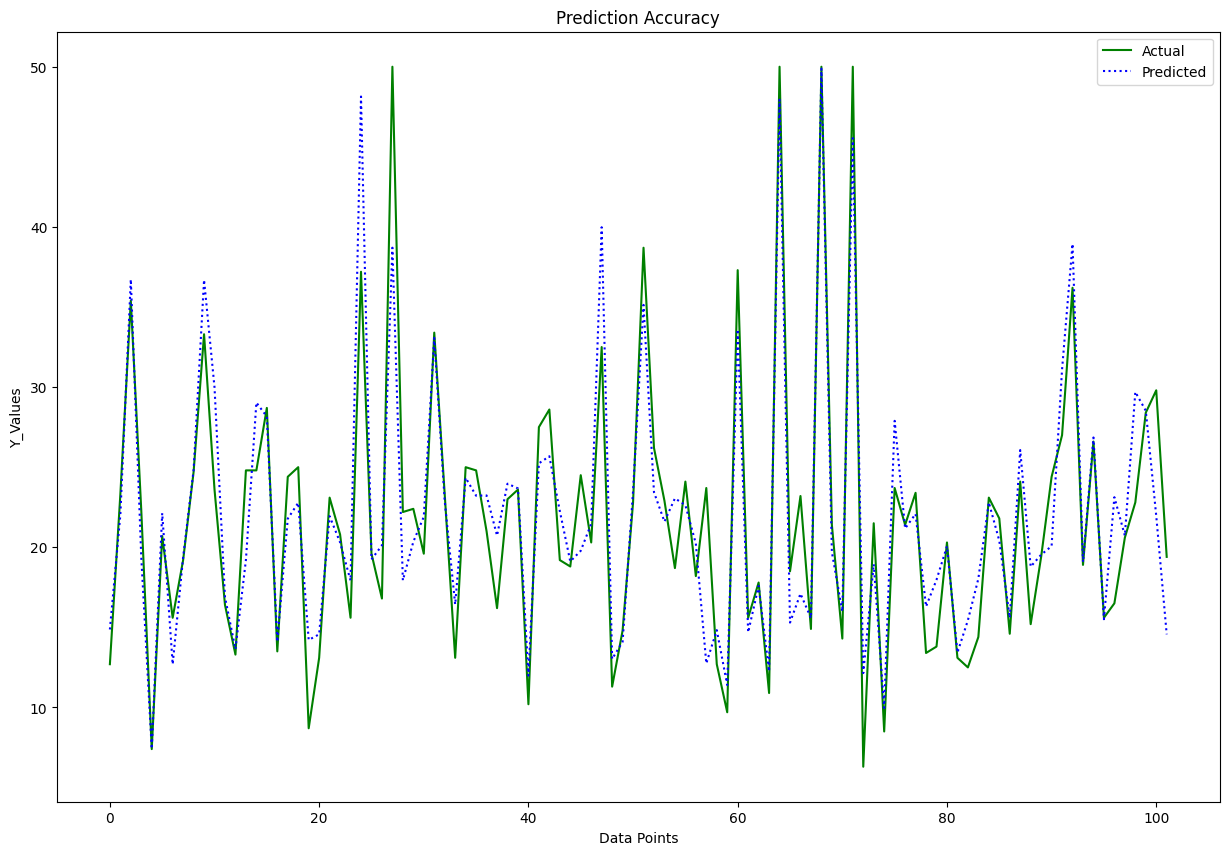

In [ ]:
plot_predictions(y_true=tf.squeeze(y_test), y_preds=tf.squeeze(test_model_2.predict(X_test)))